<a href="https://colab.research.google.com/github/ardiusebenezer07/Machine-Learning/blob/main/Multiple_Linear_Regression_50_Startup_Ardius_Ebenezer_Simanjuntak_1103210208.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Ardius Ebenezer Simanjuntak

NIM: 1103210208

Dataset:50_Startups.csv



Importing libraries

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Checking information Datasheet

In [ ]:
#loading dataset
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
#shape of our dataset
df.shape

(50, 5)

In [ ]:
#information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
#checking for missing data
df.isnull().sum()
#there is no missing value in the data

,0
R&D Spend,0
Administration,0
Marketing Spend,0
State,0
Profit,0


In [ ]:
#description about data
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


Visualising Dataset

In [ ]:
#This is the outlier, since we see blow the R&D is higly correlated to the Proft
#Here R&D spend is zero so its obious the profit is very low for this startup
df[df['Profit']<25000]

,R&D Spend,Administration,Marketing Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [ ]:
df[df['R&D Spend']<10000]

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [ ]:
#After observing above few startup data, We can say that for Index 49 (which is Outlier) there is some error in Profit
#typo error maybe. Sonce Profit for other startups with very R&D Spend is much higher than this
#We will be removing the outlier from the dataset
df.drop(index=49,axis=0,inplace=True)
df.shape

(49, 5)

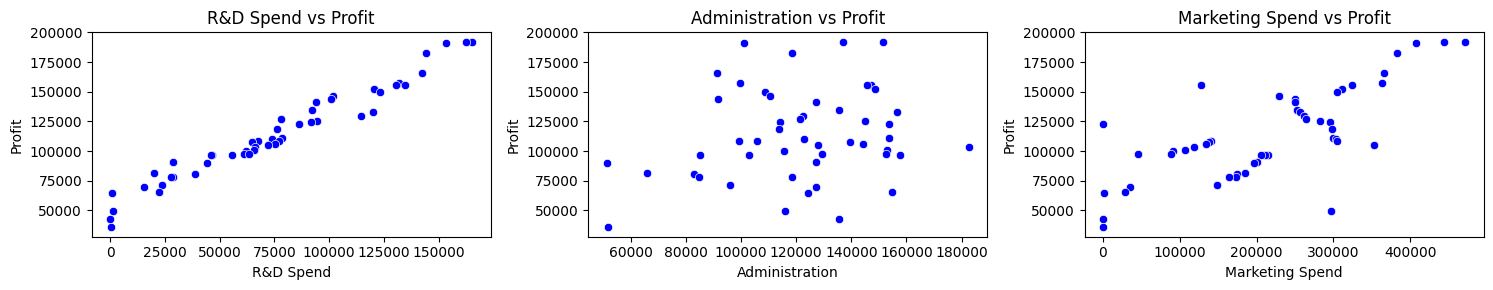

In [ ]:
#Distribution Plot of independent variables an it seems  all variables are Normally distributed.
plt.figure(figsize=(20,3))
for i,col in zip(range(1,4),df.columns):
    plt.subplot(1,4,i)
    sns.scatterplot(x=col,y='Profit',data=df,color='blue')
    plt.title(f"{col} vs Profit")
    plt.tight_layout()

Text(0.5, 1.0, 'R&D Spend vs Marketing Spend')

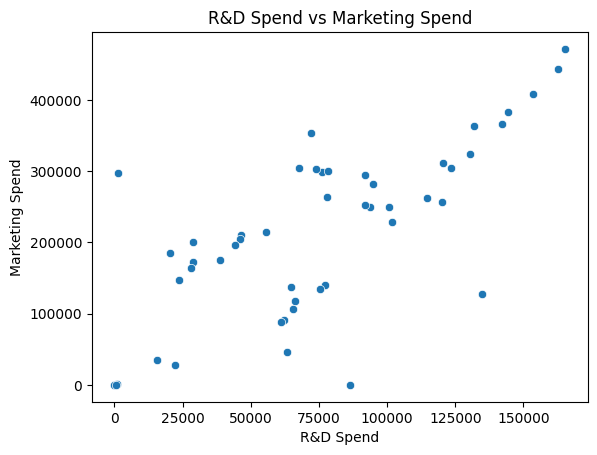

In [ ]:
#This shows linear relationship between R&D Spend and Marketing Spend
sns.scatterplot(x='R&D Spend',y='Marketing Spend',data=df)
plt.title("R&D Spend vs Marketing Spend")

In [ ]:
df1 = df.copy()
df1.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Wrangling Dataset

In [ ]:
#droping column Marketing Spend (because of Multicollinearity with R&D Spend)
#droping column Adminstration(because of very low correlation with Proft)
df2 = df1.drop(columns=['Marketing Spend','Administration'],axis=1)
df2.head()

,R&D Spend,State,Profit
0,165349.20,New York,192261.83
1,162597.70,California,191792.06
2,153441.51,Florida,191050.39
3,144372.41,New York,182901.99
4,142107.34,Florida,166187.94


In [ ]:
sns.heatmap(df2.corr(),annot=True)

ValueError: could not convert string to float: 'New York'

In [ ]:
#we have one Catgorical variable column also 'State'
#Lets explore and analyse it

df2.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [ ]:
#There are three unique states and their counts are given below. They are equally distributed.

df2.groupby('State')['State'].count()

,State
State,
California,16
Florida,16
New York,17


In [ ]:
#We will convert this column into dummy variables
df3 = pd.get_dummies(data=df2)
df3.head()

,R&D Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,192261.83,False,False,True
1,162597.70,191792.06,True,False,False
2,153441.51,191050.39,False,True,False
3,144372.41,182901.99,False,False,True
4,142107.34,166187.94,False,True,False


In [ ]:
#To avoid dummy variable Trap, we will drop one dummy variable. Let us remove State_California
df4 = df3.drop(labels=['State_California'],axis=1)
df4.head()

,R&D Spend,Profit,State_Florida,State_New York
0,165349.20,192261.83,False,True
1,162597.70,191792.06,False,False
2,153441.51,191050.39,True,False
3,144372.41,182901.99,False,True
4,142107.34,166187.94,True,False


Splitting Dataset into Train and Test Set for ML model

In [ ]:
#Now we are done with data preprocessing steps
#Now will split our dataset into Dependent variable and Independent variable

X = df4.iloc[:,[0,2,3]].values
y = df4.iloc[:,1].values

In [ ]:
print(f"Shape of Dependent Variable X = {X.shape}")
print(f"Shape of Independent Variable y = {y.shape}")

Shape of Dependent Variable X = (49, 3)
Shape of Independent Variable y = (49,)


In [ ]:
#Now we will spit our data into Train set and Test Set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 101)

In [ ]:
print(f"Shape of X_train = {X_train.shape}")
print(f"Shape of X_test = {X_test.shape}")
print(f"Shape of y_train = {y_train.shape}")
print(f"Shape of y_test = {y_test.shape}")

Shape of X_train = (39, 3)
Shape of X_test = (10, 3)
Shape of y_train = (39,)
Shape of y_test = (10,)


Building Linear Regression Model

In [ ]:
#Now we will build regression model on Training Set and Test it on our Test Set

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X=X_train,y=y_train)

LinearRegression()

In [ ]:
#Now it's time to test the accuracy of the model on our Test Data
#this is very good accuracy on training set
lm.score(X_train,y_train)

0.9627751272930376

Model Evaluation

In [ ]:
#Now we can see how model performs on test dataset
y_pred = lm.predict(X_test)
data = {'y_test':y_test,'y_pred':y_pred.round(2)}
pd.DataFrame(data=data)

,y_test,y_pred
0,90708.19,73382.98
1,110352.25,112267.38
2,118474.03,114900.98
3,81229.06,63833.66
4,124266.90,127497.13
5,191792.06,188966.03
6,64926.08,47338.87
7,111313.02,113722.74
8,126992.93,116410.05
9,49490.75,49923.83


In [ ]:
#coefficients of regression model
coeff = f'Profit = ({lm.intercept_} x Bias) '
for i,col in zip(range(3),df4.columns[[0,2,3]]):
    coeff+=f'+\n ({lm.coef_[i]} x {col}) '

print(coeff)

Profit = (49491.02605460255 x Bias) +
 (0.8577919938062497 x R&D Spend) +
 (-695.5899394338744 x State_Florida) +
 (-3010.1465064603735 x State_New York) 


Interpreting Results

In [ ]:
from sklearn import metrics
r2= metrics.r2_score(y_test,y_pred)
N,p = X_test.shape
adj_r2 = 1-((1-r2)*(N-1))/(N-p-1)
print(f'R^2 = {r2}')
print(f'Adjusted R^2 = {adj_r2}')

R^2 = 0.9242380072120073
Adjusted R^2 = 0.886357010818011


**Our Linear Regression Model for Test Set gives**

R^2 = 0.92

Adjusted R^2 = 0.87

**Profit = (49491.02605460257 x Bias) + (0.8577919938062496 x R&D Spend) + (-695.5899394338772 x State_Florida) + (-3010.1465064603767 x State_New York)**


****

**Interpreting Coefficients**
1. It means that taking other variables constant, for every 1 unit increase in R&D Spent -> Profit INCREASE by 0.86 units.

2. Remaining other variables constant, if Startup operates in Florida -> Profit will DECREASE by 695.59 units.

3. Remaining other variables constant, if Startup operates in Nw York -> Profit will DECREASE by 3010.15 units.

Predict Result


In [ ]:
def predict_profit(rd_spent,state):
    s1=s2=0
    if state == 'Florida':
        s1=1
    elif state == 'New York':
        s2=1

    X = np.array([rd_spent,s1,s2]).reshape(1,3)
    return float(lm.predict(X))

In [ ]:
rd_spent = float(input('Enter the R&D Spent: '))
state = input('Enter the state in which you operate: ')
print(f'\nExpected Profit will be {round(predict_profit(rd_spent,state),2)}')

Enter the R&D Spent: 80
Enter the state in which you operate: 60

Expected Profit will be 49559.65


<ipython-input-39-818a7a103993>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(lm.predict(X))
